# MVRegFus: Stitching

Notebook to test stitching / tiling of many tif stacks.

- Create test data
- Write to tifs
- Run registration and fusion

In [1]:
%matplotlib widget
import mvregfus
from mvregfus import multiview

import numpy as np
from scipy import ndimage
from dask import array as da
import tifffile

In [2]:
# for i in range(9):
#     im = tifffile.imread('/home/malbert/Downloads/stitching/t%s.tif' %(i+1))
#     for t in range(len(im)):
#         print(i, t)
#         tifffile.imwrite('/home/malbert/Downloads/stitching/premovie/premovie_t%03d_ch00_%s.tif' %(t, i+1), im[t,:,0])

In [3]:
from mvregfus import mv_graph, io_utils, mv_utils

import importlib
mv_graph = importlib.reload(mv_graph)
io_utils = importlib.reload(io_utils)
mv_utils = importlib.reload(mv_utils)
multiview = importlib.reload(multiview)

for t in range(0, 19):

    px_overlap_between_stacks = 30

    # specify input views
    view_dict = dict()
    # for iind, ind in enumerate(np.ndindex(x.numblocks)):
    # fp = '/home/malbert/Downloads/stitching/emb_9/tif_planes/f_%(tile)01d_t%(t)03d_c%(ch)03d.tif'
    fp = '/home/malbert/Downloads/stitching/premovie/premovie_t%(t)03d_ch00_%(tile)01d.tif'

    tiles = range(1, 10)

    def tile_index_to_gridpos(iind):
        if iind <=2: return ((0, iind))
        elif iind <=5: return ((1, 5-iind))
        else: return ((2, iind-6))

    xy_shape = None
    for iind, tile in enumerate(tiles):
        view_dict[iind] = dict()
        view_dict[iind]['view'] = iind # view identifier
        view_dict[iind]['filename'] = fp %{'tile': tile, 't':t+1, 'ch':1}
        if xy_shape is None:
            xy_shape = np.array(tifffile.imread(view_dict[iind]['filename']).shape)
            # xy_shape = np.array(io_utils.)
        view_dict[iind]['spacing'] = np.ones(3)
        view_dict[iind]['rotation'] = 0 # all tiles have same rotation angle
        view_dict[iind]['shape'] = xy_shape

        view_dict[iind]['origin'] = np.array((0,)+tile_index_to_gridpos(iind)) * \
                                    np.array((0,) + tuple(xy_shape[1:])) \
                                    - 2 * np.array((0,)+tile_index_to_gridpos(iind)) * px_overlap_between_stacks

    pairs = [(ii,ij) for ii, i in enumerate(tiles)
             for ij, j in enumerate(tiles)
             if np.sum(np.abs(np.array(tile_index_to_gridpos(ii))-np.array(tile_index_to_gridpos(ij)))) == 1 and ii<ij]

    # pairs = pairs[:1]

    # build dask graph
    graph = mvregfus.mv_graph.build_multiview_graph(
        out_dir='/home/malbert/Downloads/stitching/mvregfus2',
        filepath=None,
        channels=[0],
        mv_registration_bin_factors=[1,1,1],
        mv_final_spacing=[1,1,1],
        pairs=pairs,
        view_dict=view_dict,
        fusion_method='weighted_average',
        fusion_weights='blending',
    #     fusion_weights='dct',
        elastix_dir='/home/malbert/software/elastix',
        pairwise_registration_mode=0, # 0: translation registration using elastix
        final_volume_mode='union',
        debug_pairwise_registration=False,
        background_level=0,
        sample=t,
        time_alignment=False,
    )

    # compute dask graph
    o = io_utils.get(graph, mv_graph.multiview_fused_label %(0, t, 0), local=True)
# graph

http://localhost:8787
]0;multi-view fusion: http://localhost:8787http://localhost:42787
]0;multi-view fusion: http://localhost:42787These pairs of keys will be registered:
[(0, 1),
 (0, 5),
 (1, 2),
 (1, 4),
 (2, 3),
 (3, 4),
 (3, 8),
 (4, 5),
 (4, 7),
 (5, 6),
 (6, 7),
 (7, 8)]
They refer to the keys in 'view_dict':
{0: {'filename': '/home/malbert/Downloads/stitching/premovie/premovie_t001_ch00_1.tif',
     'origin': array([0, 0, 0]),
     'rotation': 0,
     'shape': array([  5, 768, 768]),
     'spacing': array([1., 1., 1.]),
     'view': 0},
 1: {'filename': '/home/malbert/Downloads/stitching/premovie/premovie_t001_ch00_2.tif',
     'origin': array([  0,   0, 708]),
     'rotation': 0,
     'shape': array([  5, 768, 768]),
     'spacing': array([1., 1., 1.]),
     'view': 1},
 2: {'filename': '/home/malbert/Downloads/stitching/premovie/premovie_t001_ch00_3.tif',
     'origin': array([   0,    0, 1416]),
     'rotation': 0,
     'shape': array([  5, 768, 768]),
     'spacing': a

/home/malbert/miniconda3/envs/mvregfus/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42787 instead
  warnings.warn(


compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
stack size in FFT translation registration: [5, 768, 60]
DECORATOR local... register_linear_elastix
producing /home/malbert/Downloads/stitching/mvregfus2/mv_params_000_004_vfix000_vmov005.prealignment.h5
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
stack size in FFT translation registration: [5, 60, 768]
DECORATOR local... register_linear_elastix
producing /home/malbert/Downloads/stitching/mvregfus2/mv_params_000_004_vfix001_vmov002.prealignment.h5
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
stack size in FFT translation registration: [5, 768, 60]
DECORATOR local... register_linear_elastix
producing /home/malbert/Downloads/stitching/mvregfus2/mv_params_000_004_vfix002_vmov003.prealignment.h5
compute clahe with kernel siz

FileNotFoundError: [Errno 2] No such file or directory: '/home/malbert/Downloads/stitching/premovie/premovie_t019_ch00_1.tif'

In [ ]:
# res = o.compute()#scheduler='single-threaded')

In [ ]:
a=

In [ ]:
%debug

In [317]:
ls /home/malbert/Downloads/stitching/mvregfus1_max

mv_params0_000_000.prealignment.h5
mv_params_000_000_vfix000_vmov001.prealignment.h5
mv_params_000_000_vfix000_vmov007.prealignment.h5
mv_params_000_000_vfix001_vmov002.prealignment.h5
mv_params_000_000_vfix001_vmov006.prealignment.h5
mv_params_000_000_vfix002_vmov003.prealignment.h5
mv_params_000_000_vfix002_vmov005.prealignment.h5
mv_params_000_000_vfix003_vmov004.prealignment.h5
mv_params_000_000_vfix004_vmov005.prealignment.h5
mv_params_000_000_vfix005_vmov006.prealignment.h5
mv_params_000_000_vfix006_vmov007.prealignment.h5
mv_params_000_001_vfix000_vmov001.prealignment.h5
mv_params_000_001_vfix001_vmov002.prealignment.h5
mv_params_000_001_vfix001_vmov006.prealignment.h5
mv_reginfo_000_000_pair_0_1_view_0.tif
mv_reginfo_000_000_pair_0_1_view_1.tif
mv_reginfo_000_000_pair_0_1_view_1_pretransformed.tif
mv_reginfo_000_000_pair_0_7_view_0.tif
mv_reginfo_000_000_pair_0_7_view_7.tif
mv_reginfo_000_000_pair_0_7_view_7_pretransformed.tif
mv_reginfo_000_000_pair_1_2_view_1.tif
mv_reginfo_0

(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb05e1db970>)

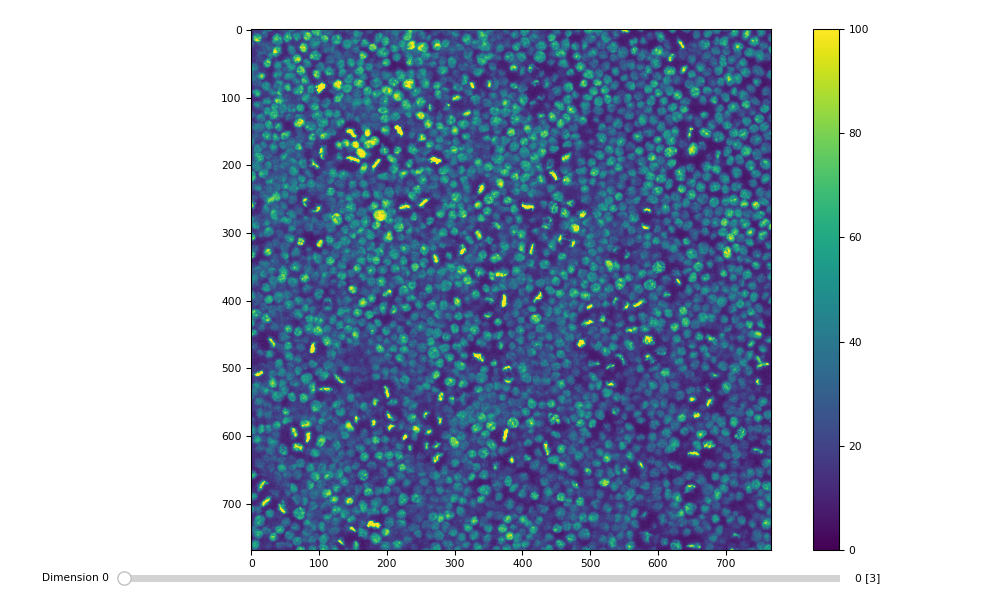

In [336]:
im0 = tifffile.imread('/tmp/im0.tif')
im1 = tifffile.imread('/tmp/im1.tif')
im1t = tifffile.imread('/tmp/im1t.tif')

tifffile.imshow(np.array([im0,im1,im1t]).max(-3), vmin=0, vmax=100, photometric='la')

In [332]:
multiview.transform_stack_sitk(stack_properties=

Signature:
multiview.transform_stack_sitk(
    stack,
    p=None,
    out_shape=None,
    out_spacing=None,
    out_origin=None,
    interp='linear',
    stack_properties=None,
)
Docstring: <no docstring>
File:      ~/software/MVRegFus/mvregfus/multiview.py
Type:      function


In [337]:
import h5py
# h5py.File('/home/malbert/Downloads/stitching/mvregfus2/mv_params_000_000_vfix000_vmov001.prealignment.h5')['prealignment'][()]
fns_tview = ['/home/malbert/Downloads/stitching/mvregfus1_max/mv_transf_view_000_000_v%03d_c00.image.ims' %v for v in range(8)]

ims = np.array([h5py.File(fn_tview, 'r')['Data'][()].max(-3) for fn_tview in fns_tview])
# tifffile.imshow(ims[[0,1]], vmin=0, vmax=100)
tifffile.imshow(ims[:], vmin=0, vmax=100)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/malbert/Downloads/stitching/mvregfus1_max/mv_transf_view_000_000_v000_c00.image.ims', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:46<00:00,  1.36s/it]


(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb0420f66d0>)

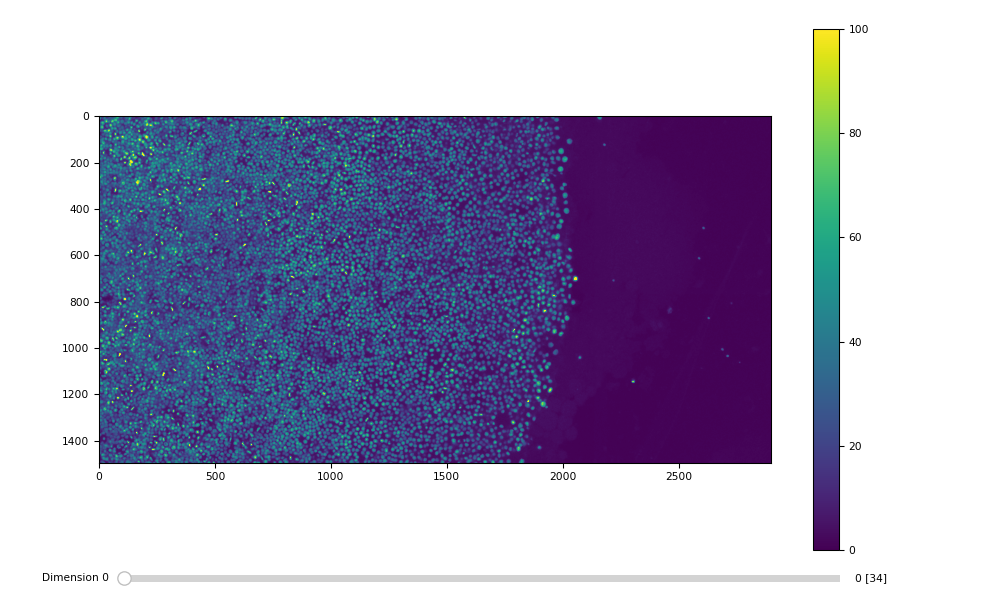

In [400]:
imt = []
from tqdm import tqdm
min_shape = np.array([50000, 50000])
for t in tqdm(range(34)):
    import h5py
    # fns_tview = ['/home/malbert/Downloads/stitching/mvregfus2/mv_transf_view_000_%03d_v%03d_c00.image.ims' %(t, v) for v in range(9)]
    fns_tview = ['/home/malbert/Downloads/stitching/mvregfus1_max/mv_transf_view_000_%03d_v%03d_c00.image.ims' %(t, v) for v in range(8)]

    ims = np.array([h5py.File(fn_tview, 'r')['Data'][()].max(-3) for fn_tview in fns_tview])

    w = np.sum(ims!=0, 0)
    w[w==0]=1
    im = np.sum(ims, 0)/w
    imt.append(im)
    min_shape = np.min([min_shape, im.shape],0)
imt = np.array([i[:min_shape[0], :min_shape[1]] for i in imt])
# imt = np.array([i[:] for i in imt])


tifffile.imshow(imt, vmin=0, vmax=100, photometric='la')

In [89]:
rm -r /home/malbert/Downloads/stitching/mvregfus1

In [235]:
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_7_view_0.tif')
im2 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_7_view_7.tif')
im2t = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_7_view_7_pretransformed.tif')
im2.shape

(7, 90, 768)

{'tvec': array([ 4.77955125e-02, -9.90236212e+01]), 'success': 0.02852713564508309, 'angle': 0}


(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb120e2dd90>)

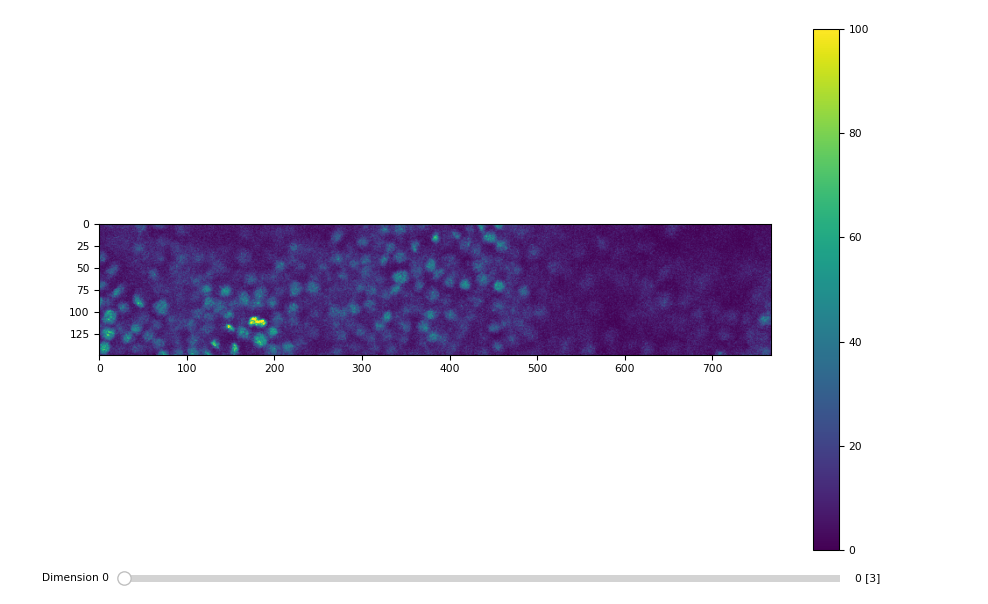

In [270]:
import imreg_dft
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_7_view_0.tif')[0]
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_7_view_7.tif')[0]

t = imreg_dft.translation(im0, im1, odds=0.5)
print(t)
im1t = ndimage.affine_transform(im1, matrix=[[1,0],[0,1]], offset=t['tvec'][::-1])

tifffile.imshow(np.array([im0,im1, im1t]), vmin=0, vmax=100, photometric='la')

In [392]:
skimage.registration.phase_cross_correlation?

Signature:
skimage.registration.phase_cross_correlation(
    reference_image,
    moving_image,
    *,
    upsample_factor=1,
    space='real',
    return_error=True,
    reference_mask=None,
    moving_mask=None,
    overlap_ratio=0.3,
    normalization='phase',
)
Docstring:
Efficient subpixel image translation registration by cross-correlation.

This code gives the same precision as the FFT upsampled cross-correlation
in a fraction of the computation time and with reduced memory requirements.
It obtains an initial estimate of the cross-correlation peak by an FFT and
then refines the shift estimation by upsampling the DFT only in a small
neighborhood of that estimate by means of a matrix-multiply DFT [1]_.

Parameters
----------
reference_image : array
    Reference image.
moving_image : array
    Image to register. Must be same dimensionality as
    ``reference_image``.
upsample_factor : int, optional
    Upsampling factor. Images will be registered to within
    ``1 / upsample_facto

In [396]:
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_0.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_7.tif')

# im0 = multiview.clahe(im0, 10,clip_limit=0.02)
# im1 = multiview.clahe(im1, 10,clip_limit=0.02)

t = skimage.registration.phase_cross_correlation(im0, im1, upsample_factor=10, normalization=None)[0]
t, im0.shape

(array([-0.7, 29.7, -1.3]), (10, 60, 768))

(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb074c432e0>)

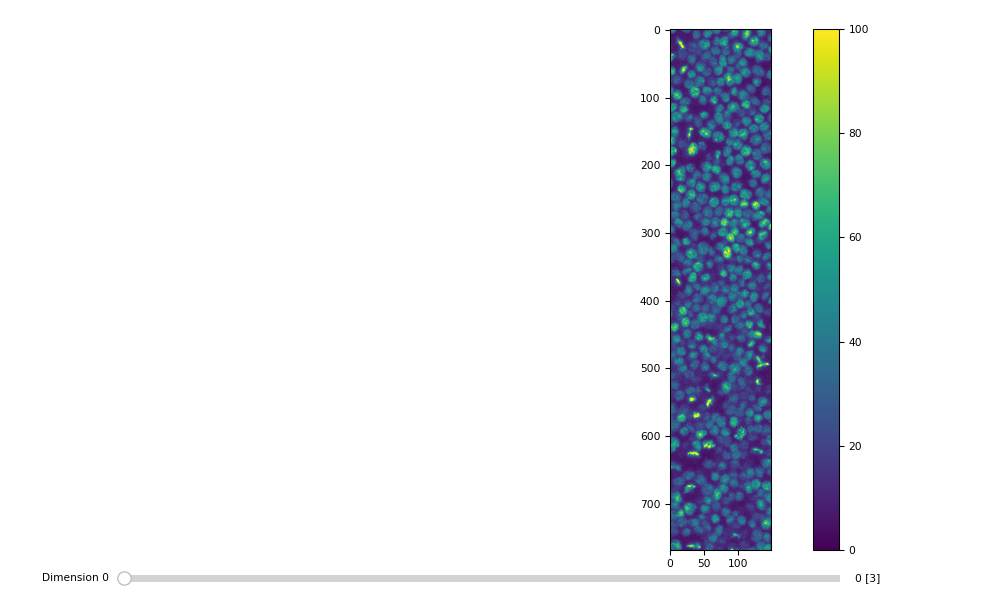

In [301]:
# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_2_5_view_2.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_2_5_view_5.tif')
# im1t = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_2_5_view_5_pretransformed.tif')

im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_6_view_0.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_1_view_1.tif')
im1t = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_1_view_1_pretransformed.tif')
tifffile.imshow(np.array([im0,im1, im1t]).max(-3), vmin=0, vmax=100, photometric='la')

compute clahe with kernel size 10
compute clahe with kernel size 10
corr [0.0, 1.0, -85.1] -0.004098899198092614 0.8732204861111111
corr [0.0, 1.0, 85.1] -0.012490067597379334 0.8732204861111111
corr [0.0, 1.0, 853.1] -1 0.0
corr [0.0, 1.0, -682.9] 0.13684231734206254 0.10883246527777778
corr [0.0, -1.0, -85.1] -0.02644576739035127 0.8732204861111111
corr [0.0, -1.0, 85.1] -0.010145177077156588 0.8732204861111111
corr [0.0, -1.0, 853.1] -1 0.0
corr [0.0, -1.0, -682.9] 0.11622201634411121 0.10883246527777778
corr [0.0, 59.0, -85.1] -1 0.014800347222222222
corr [0.0, 59.0, 85.1] -1 0.014800347222222222
corr [0.0, 59.0, 853.1] -1 0.0
corr [0.0, 59.0, -682.9] -1 0.0018446180555555555
corr [0.0, -61.0, -85.1] -1 0.0
corr [0.0, -61.0, 85.1] -1 0.0
corr [0.0, -61.0, 853.1] -1 0.0
corr [0.0, -61.0, -682.9] -1 0.0
corr [-0.0, 1.0, -85.1] -0.004098899198092614 0.8732204861111111
corr [-0.0, 1.0, 85.1] -0.012490067597379334 0.8732204861111111
corr [-0.0, 1.0, 853.1] -1 0.0
corr [-0.0, 1.0, -682.9

(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb05e224cd0>)

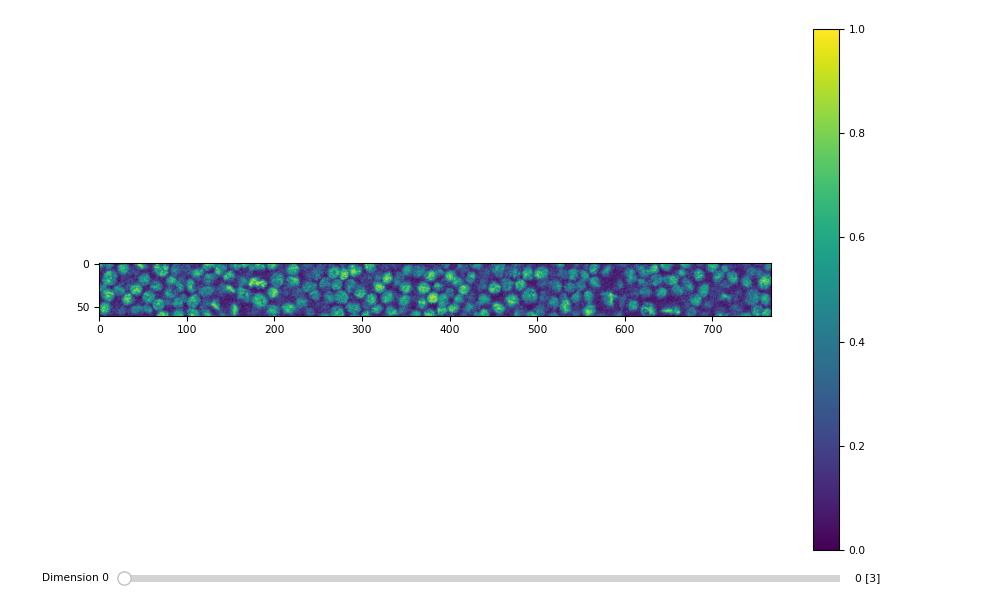

In [345]:
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_0.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_7.tif')
# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_6_7_view_6.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_6_7_view_7.tif')
# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_2_5_view_2.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_2_5_view_5.tif')
# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_1_view_0.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_0_1_view_1.tif')

# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_000_pair_6_7_view_6.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_000_pair_6_7_view_7.tif')

# im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_000_pair_5_6_view_5.tif')
# im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_000_pair_5_6_view_6.tif')

im0 = multiview.clahe(im0, 10,clip_limit=0.02)
im1 = multiview.clahe(im1, 10,clip_limit=0.02)

t = skimage.registration.phase_cross_correlation(im0, im1, upsample_factor=10)[0]

from scipy import stats
corrs = []
t_candidates = []
for s1 in [-2,-1,0,1]:
    for s2 in [-2,-1,0,1]:
        for s3 in [-2,-1,0,1]:
            # t_candidates.append([[-1,1][s1]*t[0], [-1,1][s2]*t[1], [-1,1][s3]*t[2]])
            t_candidate = []
            for d in range(3):
                if [s1,s2,s3][d] == -2: t_candidate.append(t[d])
                elif [s1,s2,s3][d] == -1: t_candidate.append(-t[d])
                elif [s1,s2,s3][d] == 0: t_candidate.append(-(t[d]-im1.shape[d]))
                elif [s1,s2,s3][d] == 1: t_candidate.append(-t[d]-im1.shape[d])
            t_candidates.append(t_candidate)
                    
for t_ in t_candidates:
    im1t = ndimage.affine_transform(im1+1, params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t_)),
    order=1, mode='constant', cval=0)
    mask = im1t > 0
    if float(np.sum(mask)) / np.product(im1.shape) < 0.1:
        corr = -1
    else:
        corr = stats.spearmanr(im0[mask], im1t[mask]).correlation
    print('corr', t_, corr, float(np.sum(mask)) / np.product(im1.shape))
    corrs.append(corr)
    
t = t_candidates[np.argmax(corrs)]
# t[2]=t[2]+1
# t[1]=t[1]-1
im1t = ndimage.affine_transform(im1, matrix=multiview.params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t)))
print(t)
tifffile.imshow(np.array([im0,im1, im1t]).max(-3), vmin=0, vmax=1, photometric='la')

(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb047ce0760>)

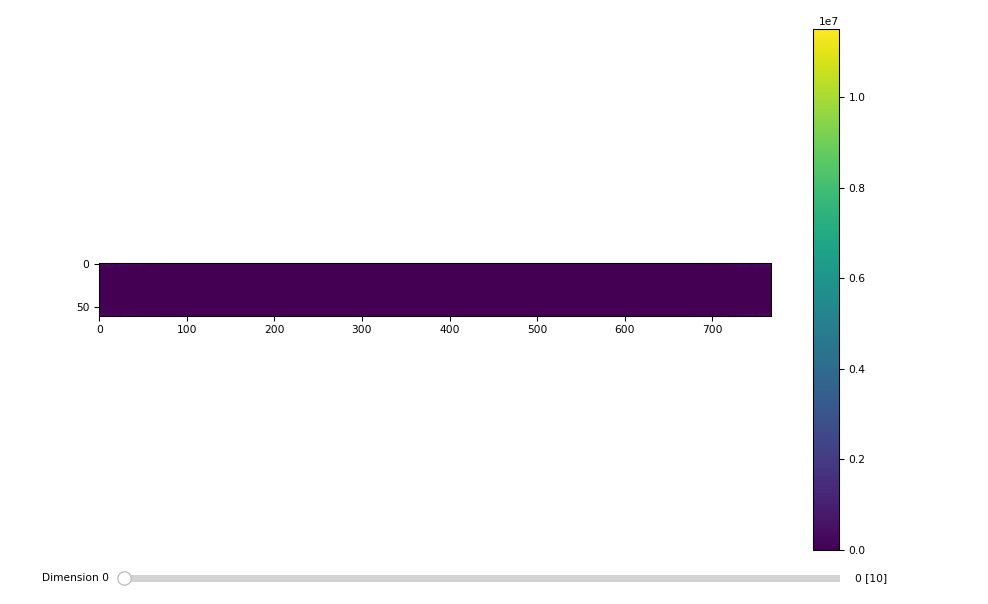

In [362]:
tifffile.imshow(abs(f1))

compute clahe with kernel size 10
compute clahe with kernel size 10
from spec: [  7  30 767]


(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb046fb9310>)

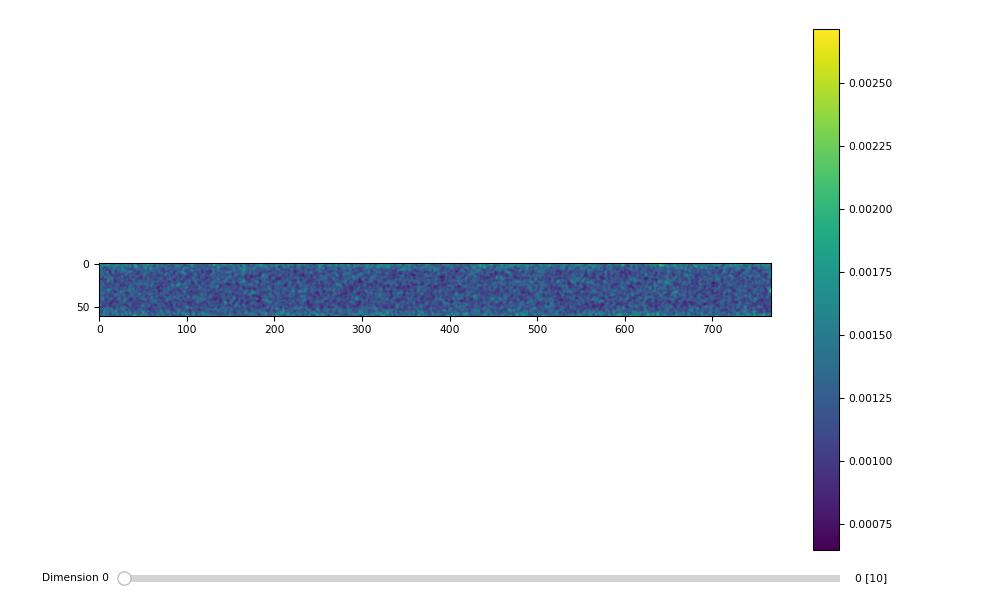

In [378]:
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_0.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_7.tif')

im0 = (im0-im0.min())/(im0.max()-im0.min())
im1 = (im1-im1.min())/(im1.max()-im1.min())

im0 = multiview.clahe(im0, 10,clip_limit=0.02)
im1 = multiview.clahe(im1, 10,clip_limit=0.02)

params_to_matrix = multiview.params_to_matrix

# t = skimage.registration.phase_cross_correlation(im0, im1, upsample_factor=1)[0]
#t = np.array([t0, t1, t2])

f0 = fftn(im0)
f1 = fftn(im1)
# f0[f0==0] = 1
# f1[f1==0] = 1
ir = abs(ifftn((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))

# print('WARNING: FILTERING IN FFT REGISTRATION (added 20181109)')
ir_gauss = ndimage.gaussian_filter(ir,1, mode='wrap')

t0, t1, t2 = np.unravel_index(np.argmax(ir_gauss), ir_gauss.shape)
t = np.array([t0, t1, t2])
print('from spec:', t)

tifffile.imshow(np.array([ir_gauss]), photometric='la')

from spec: [0 0 0]
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, -768] -1 0
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, -768] -1 0
corr [0, -60, 0] -1 0
corr [0, -60, 0] -1 0
corr [0, -60, -768] -1 0
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, -768] -1 0
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, 0] 0.010637888069379929 460800
corr [0, 0, -768] -1 0
corr [0, -60, 0] -1 0
corr [0, -60, 0] -1 0
corr [0, -60, -768] -1 0
corr [-10, 0, 0] -1 0
corr [-10, 0, 0] -1 0
corr [-10, 0, -768] -1 0
corr [-10, 0, 0] -1 0
corr [-10, 0, 0] -1 0
corr [-10, 0, -768] -1 0
corr [-10, -60, 0] -1 0
corr [-10, -60, 0] -1 0
corr [-10, -60, -768] -1 0
[0, 0, 0]


(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb0427d0370>)

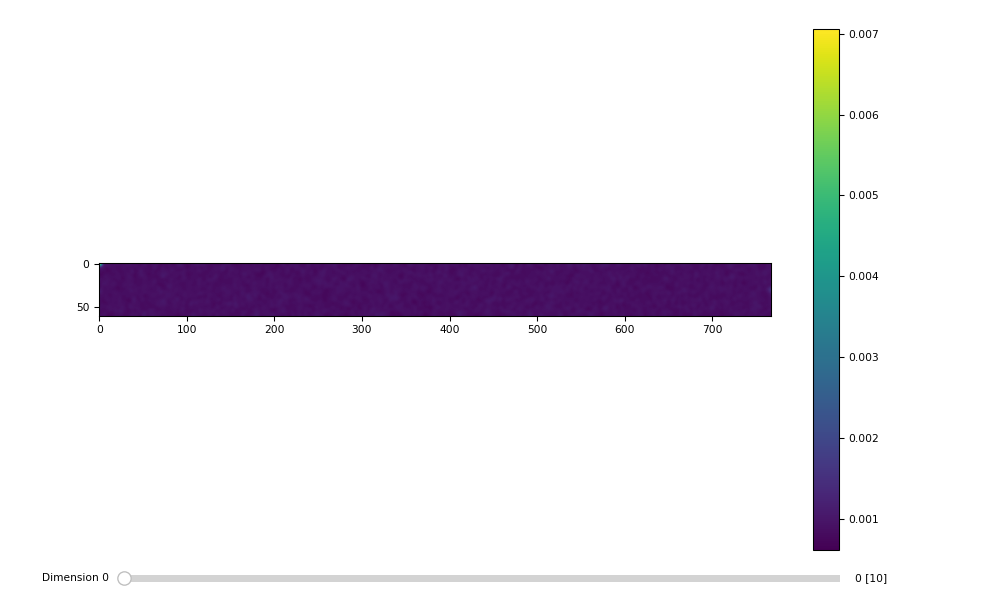

In [389]:
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_0.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1_max/mv_reginfo_000_003_pair_0_7_view_7.tif')

im0 = (im0-im0.min())/(im0.max()-im0.min())
im1 = (im1-im1.min())/(im1.max()-im1.min())

# im0 = multiview.clahe(im0, 10,clip_limit=0.02)
# im1 = multiview.clahe(im1, 10,clip_limit=0.02)

params_to_matrix = multiview.params_to_matrix

# t = skimage.registration.phase_cross_correlation(im0, im1, upsample_factor=1)[0]
#t = np.array([t0, t1, t2])

f0 = fftn(im0)
f1 = fftn(im1)
f0[f0==0] = 10000000
f1[f1==0] = 10000000
ir = abs(ifftn((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))

# print('WARNING: FILTERING IN FFT REGISTRATION (added 20181109)')
ir_gauss = ndimage.gaussian_filter(ir,2, mode='mirror')

t0, t1, t2 = np.unravel_index(np.argmax(ir_gauss), ir_gauss.shape)
t = np.array([t0, t1, t2])
print('from spec:', t)

from scipy import stats
corrs = []
t_candidates = []
for s1 in [-1,0,1]:
    for s2 in [-1,0,1]:
        for s3 in [-1,0,1]:
            # t_candidates.append([[-1,1][s1]*t[0], [-1,1][s2]*t[1], [-1,1][s3]*t[2]])
            t_candidate = []
            for d in range(3):
                if [s1,s2,s3][d] == -1: t_candidate.append(t[d])
                elif [s1,s2,s3][d] == 0: t_candidate.append(-t[d])
                elif [s1,s2,s3][d] == 1: t_candidate.append(t[d]-im1.shape[d])
            t_candidates.append(t_candidate)
                    
for t_ in t_candidates:
    im1t = ndimage.affine_transform(im1+1, params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t_)),
        order=1, mode='constant', cval=0)
    mask = im1t > 0
    if float(np.sum(mask)) / np.product(im1.shape) < 0.1:
        corr = -1
    else:
        corr = stats.spearmanr(im0[mask], im1t[mask]).correlation
    print('corr', t_, corr, np.sum(mask))
    corrs.append(corr)
    
t = t_candidates[np.argmax(corrs)]
# t[2]=t[2]+1
# t[1]=t[1]-1
# t = [0, 0, 92]
im1t = ndimage.affine_transform(im1, matrix=multiview.params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t)))
print(t)
# tifffile.imshow(np.array([im0,im1, im1t]), vmin=0, vmax=1, photometric='la')
tifffile.imshow(np.array([ir_gauss]), photometric='la')

In [353]:
ndimage.gaussian_filter?

Signature:
ndimage.gaussian_filter(
    input,
    sigma,
    order=0,
    output=None,
    mode='reflect',
    cval=0.0,
    truncate=4.0,
)
Docstring:
Multidimensional Gaussian filter.

Parameters
----------
input : array_like
    The input array.
sigma : scalar or sequence of scalars
    Standard deviation for Gaussian kernel. The standard
    deviations of the Gaussian filter are given for each axis as a
    sequence, or as a single number, in which case it is equal for
    all axes.
order : int or sequence of ints, optional
    The order of the filter along each axis is given as a sequence
    of integers, or as a single number. An order of 0 corresponds
    to convolution with a Gaussian kernel. A positive order
    corresponds to convolution with that derivative of a Gaussian.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode : str or seque

compute clahe with kernel size 10
compute clahe with kernel size 10
0 0 -2


(<Figure size 988.8x604.8 with 3 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb05deaff70>)

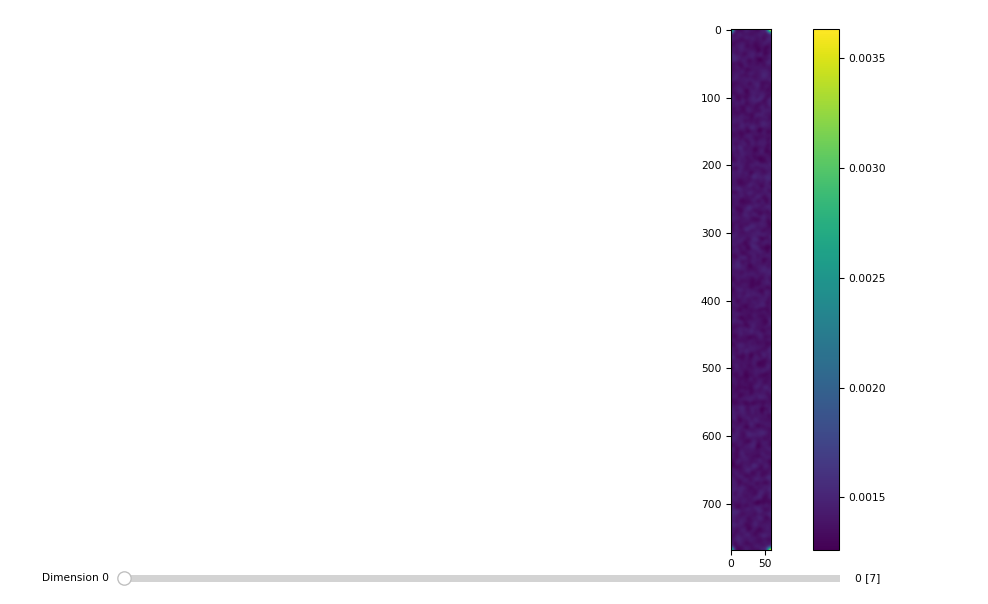

In [342]:
im0 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_6_7_view_6.tif')
im1 = tifffile.imread('/home/malbert/Downloads/stitching/mvregfus1/mv_reginfo_000_003_pair_6_7_view_7.tif')

from numpy.fft import fftn, ifftn

im1c = multiview.clahe(im0, 10,clip_limit=0.02)
im2c = multiview.clahe(im1, 10,clip_limit=0.02)
# im1c = im1
# im2c = im2

shape = im1.shape
# f0 = fftn(im0)
# f1 = fftn(im1)
f0 = fftn(im1c)
f1 = fftn(im2c)
ir = abs(ifftn((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))

# print('WARNING: FILTERING IN FFT REGISTRATION (added 20181109)')
ir_gauss = ndimage.gaussian_filter(ir,3, mode='wrap')

t0, t1, t2 = np.unravel_index(np.argmax(ir_gauss), shape)

# if t0 > shape[0] // 2: t0 -= shape[0]
# if t1 > shape[1] // 2: t1 -= shape[1]
if t2 > shape[2] // 2: t2 -= shape[2]

print(t0,t1,t2)

t = np.array([t0,t1,t2])

tifffile.imshow(ir_gauss)

(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb06783a7c0>)

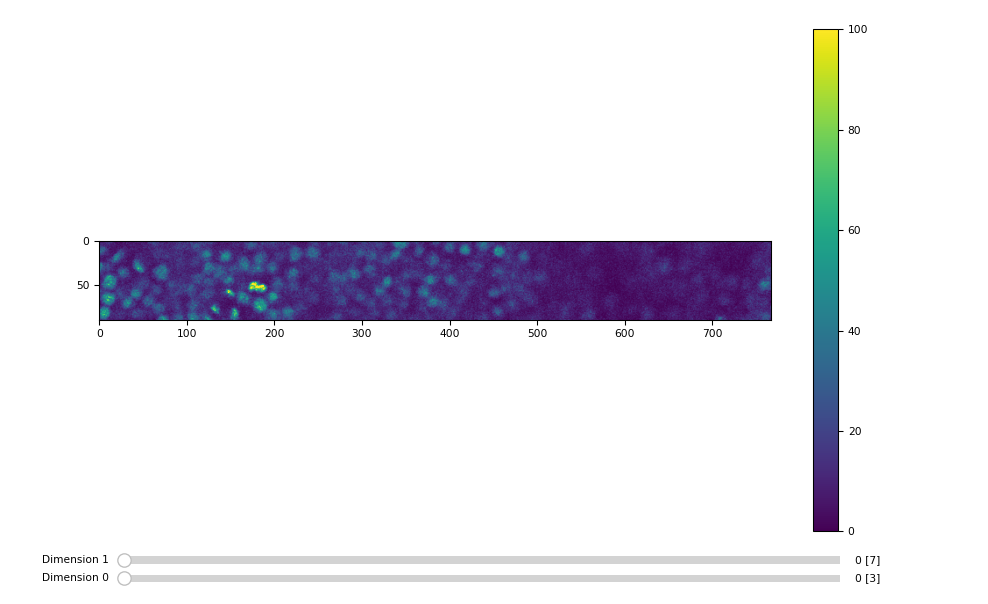

In [221]:
im1t = ndimage.affine_transform(im1, matrix=multiview.params_to_matrix([1,0,0,0,1,0,0,0,1]+list(-t)))

tifffile.imshow(np.array([im0,im1, im1t]), vmin=0, vmax=100, photometric='la')

In [154]:
import importlib
multiview = importlib.reload(multiview)
tm = multiview.register_linear_elastix(multiview.ImageArray(im1), multiview.ImageArray(im2), degree=None)
tm

DECORATOR local... register_linear_elastix
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
t00 [ 1.  0.  0.  0.  1.  0. -0.  0.  1.  0.  0.  0.]
(7, 60, 768) (7, 60, 768)
ident 3661698.900066377
mask 1
corr [-0.0, -30.0, 1.0] 0.7510407053942
corr [-0.0, -30.0, -1.0] 0.7164646710641697
corr [-0.0, 30.0, 1.0] 0.4652149241084458
corr [-0.0, 30.0, -1.0] 0.4656028206936874
corr [0.0, -30.0, 1.0] 0.7510407053942
corr [0.0, -30.0, -1.0] 0.7164646710641697
corr [0.0, 30.0, 1.0] 0.4652149241084458
corr [0.0, 30.0, -1.0] 0.4656028206936874


array([  1.,   0.,   0.,   0.,   1.,   0.,  -0.,   0.,   1.,   0., -30.,
         1.])

In [178]:
from scipy import stats
stats.spearmanr([0,1],[0,0])

/home/malbert/miniconda3/envs/mvregfus/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)

In [172]:
import importlib
multiview = importlib.reload(multiview)
import skimage
im1c = multiview.clahe(im1, 10,clip_limit=0.02)
im2c = multiview.clahe(im2, 10,clip_limit=0.02)
# im1c = im1
# im2c = im2
# t = skimage.registration.phase_cross_correlation(im1c, im2c, upsample_factor=1)
t = np.array(multiview.translation3d(im1c, im2c))
im2tc = ndimage.affine_transform(im2c, matrix=multiview.params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t)))
t

compute clahe with kernel size 10
compute clahe with kernel size 10
corr [7.0, 60.0, 767.0] -1
corr [7.0, 60.0, -1.0] -1
corr [7.0, 60.0, -769.0] -1
corr [7.0, -30.0, 767.0] -1
corr [7.0, -30.0, -1.0] -1
corr [7.0, -30.0, -769.0] -1
corr [7.0, -120.0, 767.0] -1
corr [7.0, -120.0, -1.0] -1
corr [7.0, -120.0, -769.0] -1
corr [0.0, 60.0, 767.0] 0.5195363527771664
corr [0.0, 60.0, -1.0] 0.4425039220027002
corr [0.0, 60.0, -769.0] -1
corr [0.0, -30.0, 767.0] 0.5068063700918637
corr [0.0, -30.0, -1.0] 0.49516031749463774
corr [0.0, -30.0, -769.0] -1
corr [0.0, -120.0, 767.0] -1
corr [0.0, -120.0, -1.0] -1
corr [0.0, -120.0, -769.0] -1
corr [-7.0, 60.0, 767.0] -1
corr [-7.0, 60.0, -1.0] -1
corr [-7.0, 60.0, -769.0] -1
corr [-7.0, -30.0, 767.0] -1
corr [-7.0, -30.0, -1.0] -1
corr [-7.0, -30.0, -769.0] -1
corr [-7.0, -120.0, 767.0] -1
corr [-7.0, -120.0, -1.0] -1
corr [-7.0, -120.0, -769.0] -1


array([  0.,  60., 767.])

(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb0b27a4b80>)

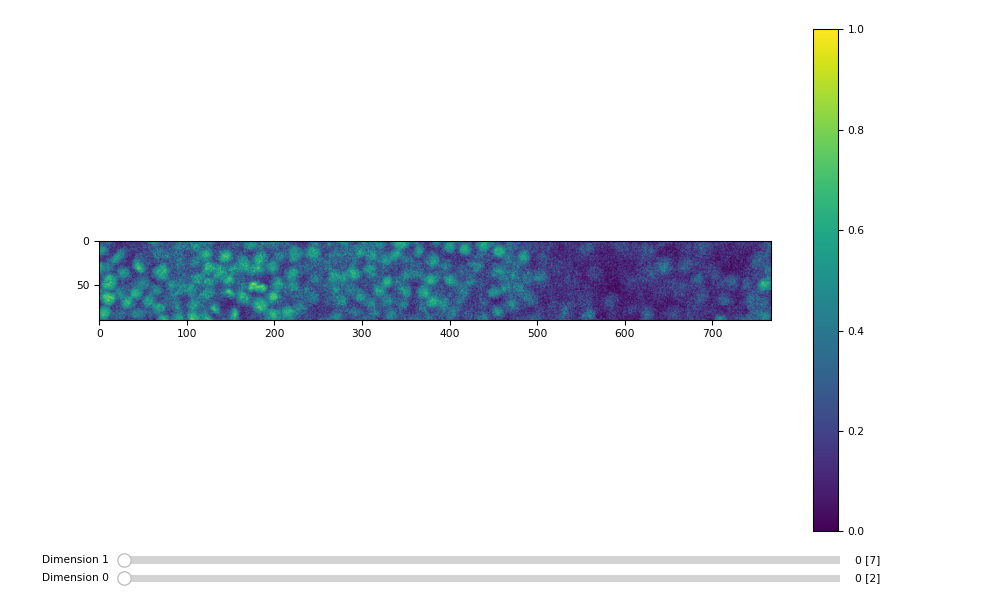

In [173]:
tifffile.imshow(np.array([im1c,im2tc]), vmin=0, vmax=1, photometric='la')

In [137]:
im1c.shape


(7, 60, 768)

In [139]:
im2c[0, 0, :3]

array([0.19066324, 0.28720351, 0.35647379])

In [ ]:
im1c.shape

In [121]:
tm = multiview.translation3d(multiview.ImageArray(im1), multiview.ImageArray(im2))
tm

CORRRRS [  0. -29.  -1.] [0.45315540350582817, 0.45442944985208206, 0.7420888524452678, 0.709629591041342, 0.45315540350582817, 0.45442944985208206, 0.7420888524452678, 0.709629591041342]


[-0.0, -29.0, 1.0]

(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb0bbaf9fd0>)

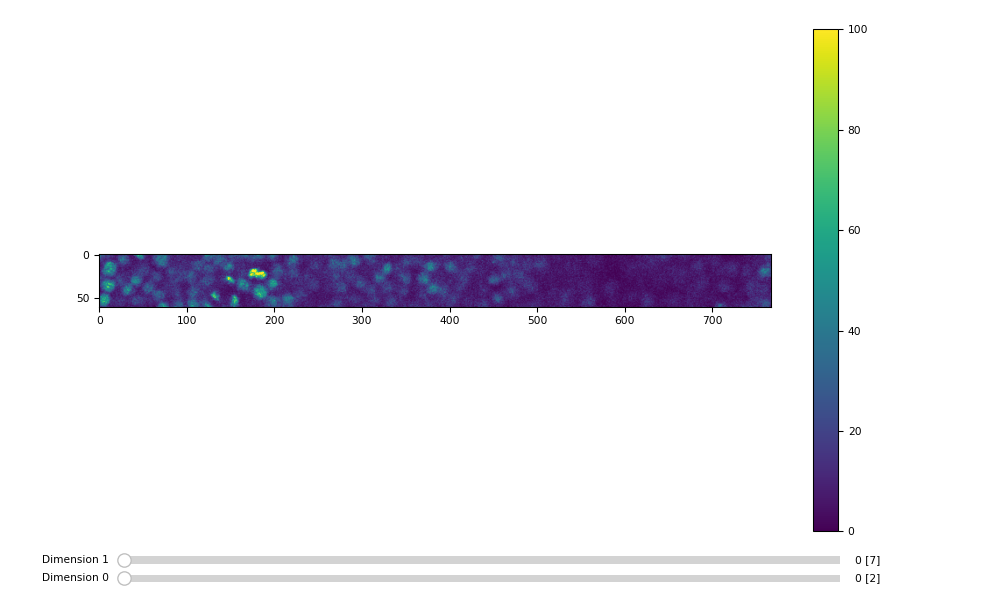

In [111]:
tifffile.imshow(np.array([im1,im2t]), vmin=0, vmax=100, photometric='la')

In [70]:
multiview.translation3d?

Signature: multiview.translation3d(im0, im1)
Docstring: Return translation vector to register images.
File:      ~/software/MVRegFus/mvregfus/multiview.py
Type:      function


In [119]:
import importlib
multiview = importlib.reload(multiview)

In [124]:
import importlib
multiview = importlib.reload(multiview)
import skimage
im1c = multiview.clahe(im1, 10)
im2c = multiview.clahe(im2, 10)
# im1c = im1
# im2c = im2
# t = skimage.registration.phase_cross_correlation(im1c, im2c, upsample_factor=1)
t = np.array(multiview.translation3d(im1c, im2c))
im2tc = ndimage.affine_transform(im2c, matrix=multiview.params_to_matrix([1,0,0,0,1,0,0,0,1]+list(t)))
t

compute clahe with kernel size 10
compute clahe with kernel size 10
CORRRRS [ 0. 30. -1.] [0.7510407053942, 0.7164646710641697, 0.4652149241084458, 0.4656028206936874, 0.7510407053942, 0.7164646710641697, 0.4652149241084458, 0.4656028206936874]


array([ -0., -30.,   1.])

(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fb0bbc9c4f0>)

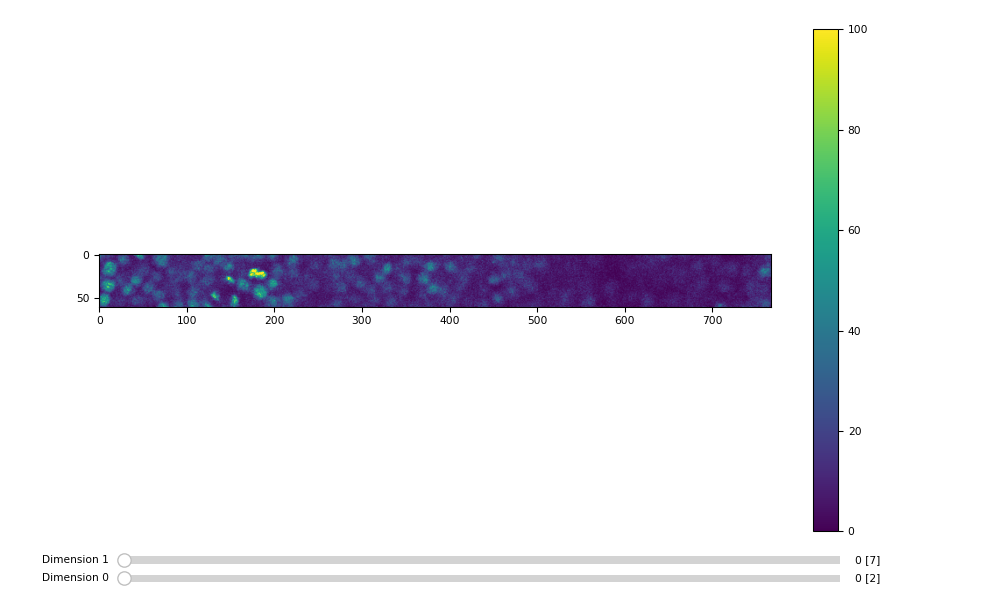

In [108]:
tifffile.imshow(np.array([im1c,im2tc]), vmin=0, vmax=100, photometric='la')

In [ ]:
# load result from file
fused_result = io_utils.process_input_element(os.path.join('data/stitch', mv_graph.multiview_fused_label %(0, 0, 0)))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(fused_result.max(-3), vmin=0, vmax=10000)
